In [78]:
import pandas as pd
import datetime

In [79]:
card_numbers = pd.read_excel(r'C:\Users\AmanovRA\Anaconda3\Work-work\Temp\all_years2.xlsx')
temp_df1 = pd.read_excel(r'C:\Users\AmanovRA\Anaconda3\Work-work\Temp\all_years.xlsx')
temp_df2 = pd.read_excel(r'C:\Users\AmanovRA\Anaconda3\Work-work\Temp\Ostatok.xlsx')
clients = pd.read_excel(r'C:\Users\AmanovRA\Anaconda3\Work-work\Temp\ПППК на 06.05.2020.xlsx')

In [80]:
card_numbers.shape

(1048565, 3)

In [81]:
card_numbers = card_numbers.append(temp_df1, ignore_index=True)
card_numbers = card_numbers.append(temp_df2, ignore_index=True)

In [82]:
card_numbers.shape

(1856130, 3)

In [85]:
card_numbers = card_numbers.drop_duplicates()

In [86]:
card_numbers.shape

(1077690, 3)

In [87]:
card_numbers['Номер карты'] = card_numbers['Номер карты'].apply(lambda x: ''.join([i for i in str(x) if i.isdigit]))
clients['ИНП'] = clients['ИНП'].apply(lambda x: ''.join([i for i in str(x) if i.isdigit]))

C:\Users\AmanovRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [88]:
card_numbers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1077690 entries, 0 to 1856129
Data columns (total 3 columns):
 #   Column                              Non-Null Count    Dtype 
---  ------                              --------------    ----- 
 0   Номер карты                         1077690 non-null  object
 1   СПУ из карточки Пациента            1077690 non-null  object
 2   Дата последнего посещения Пациента  1077690 non-null  object
dtypes: object(3)
memory usage: 32.9+ MB


In [89]:
card_numbers[card_numbers['Номер карты'].isin(clients['ИНП'])]

,Номер карты,СПУ из карточки Пациента,Дата последнего посещения Пациента
521,581,ПППК 10%,2020-05-05 00:00:00
6753,7732,ПППК 7%,2019-12-09 00:00:00
6754,7732,ПППК 10%,2019-12-09 00:00:00
7049,8110,ПППК 7%,2020-04-15 00:00:00
7050,8110,ПППК 10%,2020-04-15 00:00:00
...,...,...,...
1856125,990503515,ПППК 10%,-
1856126,990503517,ДИСКОНТНАЯ КАРТА 5%,-
1856127,990503517,ПППК 10%,-
1856128,990503518,ДИСКОНТНАЯ КАРТА 5%,-


In [90]:
clients = clients.merge(card_numbers, how='left', left_on='ИНП', right_on='Номер карты')

In [91]:
clients = clients.sort_values(by=['ИНП', 'Дата последнего посещения Пациента'])

In [92]:
clients

,ИНП,Фамилия,Имя,Отчество,дата рождения,скидка,Номер карты,СПУ из карточки Пациента,Дата последнего посещения Пациента
1314,,Ветров,Артем,Николаевич,1984-07-13,10,NaN,NaN,NaN
832,100001371,Тимофенков,Андрей,Александрович,2017-06-27,10,100001371,ПППК 5%,2020-03-05 00:00:00
833,100001371,Тимофенков,Андрей,Александрович,2017-06-27,10,100001371,ПППК 10%,2020-03-05 00:00:00
331,100003229,Савинков,Камиль,Кирилловиич,2016-02-06,10,100003229,ПППК 10%,2018-07-17 00:00:00
276,100004395,Кондратьева,Валерия,Александровна,2015-12-24,10,100004395,ПППК 10%,2020-04-24 00:00:00
...,...,...,...,...,...,...,...,...,...
4,990503517,Кумакова,Ольга,Леонидовна,1987-07-22,10,990503517,ДИСКОНТНАЯ КАРТА 5%,-
5,990503517,Кумакова,Ольга,Леонидовна,1987-07-22,10,990503517,ПППК 10%,-
2,990503518,Федорова,Светлана,Ивановна,1964-12-02,10,990503518,ДИСКОНТНАЯ КАРТА 5%,-
3,990503518,Федорова,Светлана,Ивановна,1964-12-02,10,990503518,ПППК 10%,-


In [93]:
clients[clients['Номер карты'].isnull()]

,ИНП,Фамилия,Имя,Отчество,дата рождения,скидка,Номер карты,СПУ из карточки Пациента,Дата последнего посещения Пациента
1314,,Ветров,Артем,Николаевич,1984-07-13,10,NaN,NaN,NaN
526,10017104,Иванова,Ольга,Петровна,1955-06-15,10,NaN,NaN,NaN
110,100180535,Мнасаконян,Клара,Араисовна,1983-08-05,10,NaN,NaN,NaN
397,10076666,Трехонин,Иван,Алексеевич,2018-11-10,10,NaN,NaN,NaN
410,120181888,Григорьева,Мария,Владимировна,1985-01-12,10,NaN,NaN,NaN


In [76]:
card_numbers[card_numbers['Номер карты'] == '990503513']

,Номер карты,СПУ из карточки Пациента,Дата последнего посещения Пациента


In [96]:
clients.to_excel('output.xlsx')

In [142]:
group_clients = clients.groupby('ИНП')['СПУ из карточки Пациента'].apply(list).apply(f)

In [144]:
group_clients.to_excel('output.xlsx')

In [145]:
clients[clients['ИНП']=='120280575']

,ИНП,Фамилия,Имя,Отчество,дата рождения,скидка,Номер карты,СПУ из карточки Пациента,Дата последнего посещения Пациента
57,120280575,Сидорцова,Ольга,Юрьевна,1985-04-24,10,120280575,ПППК 5%,2019-12-04 00:00:00
58,120280575,Сидорцова,Ольга,Юрьевна,1985-04-24,10,120280575,ПППК 7%,2019-12-04 00:00:00
59,120280575,Сидорцова,Ольга,Юрьевна,1985-04-24,10,120280575,ПППК 10%,2019-12-04 00:00:00
1289,120280575,Сидорцова,Ольга,Юрьевна,1985-04-24,10,120280575,ПППК 5%,2019-12-04 00:00:00
1290,120280575,Сидорцова,Ольга,Юрьевна,1985-04-24,10,120280575,ПППК 7%,2019-12-04 00:00:00
1291,120280575,Сидорцова,Ольга,Юрьевна,1985-04-24,10,120280575,ПППК 10%,2019-12-04 00:00:00


In [9]:
def f(lst):
    return '; '.join([str(x) for x in lst])

f([5, '5', 456])

'5; 5; 456'

In [34]:
import datetime

def days_diff(x ,y):
    x = datetime.date(x[0], x[1], x[2])
    y = datetime.date(y[0], y[1], y[2])
    return (x - y).days


days_diff((2014, 8, 27), (2014, 1, 1))

238

In [49]:
def checkio(in_string):
    import unicodedata

    return ''.join(c for c in unicodedata.normalize('NFD', in_string) if unicodedata.category(c) != 'Mn')

checkio(u"loài trăn lớn")# == u"loai tran lon"

'loai tran lon'

In [62]:
def goes_after(s, first, second):
    import re
    if re.search(rf'{first}{second}', s) and not re.search(rf'{second}.*{first}{second}', s):
        return True
    else:
        return False

goes_after('panorama', 'a', 'n')# == True

True

In [63]:
goes_after("almaz","m","a")

False

In [77]:
s = """DREAMING of apples on a wall,
And dreaming often, dear,
I dreamed that, if I counted all,
-How many would appear?"""

arr = []
for i in s.replace(' ', '').splitlines():
    arr.append(list(i))
    
for i, j in enumerate(arr):
    for k, l in enumerate(j):
        


[['D',
  'R',
  'E',
  'A',
  'M',
  'I',
  'N',
  'G',
  'o',
  'f',
  'a',
  'p',
  'p',
  'l',
  'e',
  's',
  'o',
  'n',
  'a',
  'w',
  'a',
  'l',
  'l',
  ','],
 ['A',
  'n',
  'd',
  'd',
  'r',
  'e',
  'a',
  'm',
  'i',
  'n',
  'g',
  'o',
  'f',
  't',
  'e',
  'n',
  ',',
  'd',
  'e',
  'a',
  'r',
  ','],
 ['I',
  'd',
  'r',
  'e',
  'a',
  'm',
  'e',
  'd',
  't',
  'h',
  'a',
  't',
  ',',
  'i',
  'f',
  'I',
  'c',
  'o',
  'u',
  'n',
  't',
  'e',
  'd',
  'a',
  'l',
  'l',
  ','],
 ['-',
  'H',
  'o',
  'w',
  'm',
  'a',
  'n',
  'y',
  'w',
  'o',
  'u',
  'l',
  'd',
  'a',
  'p',
  'p',
  'e',
  'a',
  'r',
  '?']]

In [75]:
arr = np.array()

TypeError: array() missing required argument 'object' (pos 1)

In [70]:
import os

for i in os.listdir(r'C:\Users\AmanovRA\Anaconda3\Work-work\Bloggers_analysis\Bloggers30042020'):
    if '_1' in i:
        print(i[:-7])

alimshikinst
Anastasha
bukinayana
irapozdeeva
k_nadezhdam
levchuk.mila
mamadoma_story
marta_che
Mat.ehidna
milana_lala
nastik.kozlova
vikavosk
_lettasdiary


In [3]:
def yaml(a):
    dct = {}
    for line in a.splitlines():
        line = line.strip()
        if line != '':
            line = [i.strip() for i in line.split(':')]
            if line[1].isnumeric():
                dct.setdefault(line[0], int(line[1]))
            elif line[1].lower() == 'true':
                dct.setdefault(line[0], True)
            elif line[1].lower() == 'false':
                dct.setdefault(line[0], False)
            elif line[1].lower() == '':
                dct.setdefault(line[0], None)                
            else:    
                dct.setdefault(line[0], line[1])
    return dct  

yaml("""name: Alex
age: 12""")

{'name': 'Alex', 'age': 12}

In [4]:
yaml('name: "Alex Fox"\n'
     'age: 12\n'
     '\n'
     'class: 12b')

{'name': '"Alex Fox"', 'age': 12, 'class': '12b'}

In [35]:
# https://py.checkio.org/mission/clock-angle/solve/

def clock_angle(time):
    hour, minute = [int(i) for i in time.split(':')]
    hour %= 12
    hour1 = (hour * 360 / 12) + (minute / 60 * 30)
    hour2 = abs(360 - hour1)
    minute1 = (minute * 360 / 60)
    minute2 = abs(360 - minute1)
    return min(abs(hour1 - minute1), abs(hour1 + minute2), abs(hour2 - minute2), abs(hour2 + minute1))

clock_angle("07:01")

155.5

In [11]:
def checkio(radius):
    """count tiles"""
    return [0, 0]

checkio(2.1) == [4, 20]

90

In [51]:
def bigger_together(ints):
    from itertools import permutations
    arr = [''.join(j) for j in list(permutations([str(i) for i in ints], len(ints)))]
    arr = sorted(arr, key=lambda x: int(x))
    return int(arr[-1]) - int(arr[0])
#    
bigger_together([0,1,2,3,4,5,6,7,8,9,10])

MemoryError: 

In [102]:
# https://py.checkio.org/mission/bigger-together/solve/

def bigger_together(ints):
    if len(ints) == 1:
        return 0
    arr = list(map(str, ints))
    arr1 = []
    lengths = max([len(i) for i in arr])
    for i in range(1, lengths + 1):
        arr1.append(sorted([j for j in arr if len(j) == i], key = lambda x: int(x)))  
    cnt = len(arr1)
    arr2 = []
    for i in range(1, cnt):
        first = arr1.pop()
        second = arr1.pop()
        for j in first:
            try:
                find_index = second.index(j[:-1])
                if int(j[1]) > int(j[0]):
                    second.append(j)
                    second = sorted(second, key = lambda x: int(x[0]))
                else:    
                    second.insert(find_index, j)
            except:
                second.append(j)
                second = sorted(second, key = lambda x: int(x[0]))
        arr1 += [second]
        print(arr1)
    if len(arr1) == 1:
        return int(''.join(arr1[0][::-1])) - int(''.join(arr1[0]))
    else:
        return int(''.join(arr1[::-1])) - int(''.join(arr1))     
           
                    
        
bigger_together([420,42,423])

[[], ['420', '423', '42']]
[['420', '423', '42']]


381078

In [103]:
from functools import cmp_to_key

?cmp_to_key

In [65]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

plt.style.use('ggplot')  # Красивые графики
plt.rcParams['figure.figsize'] = (20, 15)  # Размер картинок

In [260]:
data = pd.read_excel(r'R:\AmanovRA\вакцины.xlsx', sheet_name='Sheet1')

C:\Users\AmanovRA\Anaconda3\lib\site-packages\xlrd\xlsx.py:266: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():


In [261]:
data

,Код услуги,Наименование услуги,Год,Месяц,Sum([Всего начислено]),Sum([Количество])
0,80.00026,- Корь (Россия) с 1 года,2019,янв.,3942.50,42
1,80.00026,- Корь (Россия) с 1 года,2019,февр.,40731.25,435
2,80.00026,- Корь (Россия) с 1 года,2019,мар.,21018.75,226
3,80.00026,- Корь (Россия) с 1 года,2019,апр.,5676.25,61
4,80.00026,- Корь (Россия) с 1 года,2019,мая,878.75,10
...,...,...,...,...,...,...
72,80.00074,"- М-М-Р II - корь, краснуха, паротит (США) с...",2020,янв.,438900.00,233
73,80.00074,"- М-М-Р II - корь, краснуха, паротит (США) с...",2020,февр.,365750.00,193
74,80.00074,"- М-М-Р II - корь, краснуха, паротит (США) с...",2020,мар.,251275.00,133
75,80.00074,"- М-М-Р II - корь, краснуха, паротит (США) с...",2020,апр.,19950.00,11


In [262]:
group_data = data.groupby(['Год', 'Месяц', 'Наименование услуги']).agg({'Sum([Всего начислено])' : 'sum', 'Sum([Количество])' : 'sum'}).reset_index()

In [263]:
lst = '''янв.
февр.
мар.
апр.
мая
июн.
июл.
авг.
сент.
окт.
нояб.
дек.
'''.split('\n')[:-1]

dct = dict(zip(lst, range(1, 13)))

dct

{'янв.': 1,
 'февр.': 2,
 'мар.': 3,
 'апр.': 4,
 'мая': 5,
 'июн.': 6,
 'июл.': 7,
 'авг.': 8,
 'сент.': 9,
 'окт.': 10,
 'нояб.': 11,
 'дек.': 12}

In [264]:
group_data['to_sort'] = group_data['Месяц'].apply(lambda x: dct[x])

In [265]:
group_data = group_data.sort_values(['Год', 'to_sort']).reset_index()

In [266]:
group_data['period'] = group_data[['to_sort', 'Год']].apply(lambda x: '.'.join(str(value) for value in x), axis=1)

In [267]:
group_data_new = group_data

In [268]:
group_data_new = group_data_new.sort_values('Наименование услуги')
#group_data_new['Дата'] = pd.to_datetime(group_data_new['Период'])
group_data_new


,index,Год,Месяц,Наименование услуги,Sum([Всего начислено]),Sum([Количество]),to_sort,period
0,52,2019,янв.,- Корь (Россия) с 1 года,3942.50,42,1,1.2019
22,20,2019,июн.,- Корь (Россия) с 1 года,166.25,2,6,6.2019
32,0,2019,авг.,- Корь (Россия) с 1 года,451.25,5,8,8.2019
37,43,2019,сент.,- Корь (Россия) с 1 года,166.25,2,9,9.2019
17,29,2019,мая,- Корь (Россия) с 1 года,878.75,10,5,5.2019
...,...,...,...,...,...,...,...,...
41,47,2019,сент.,- Паротит (Россия) с 1 года,1140.00,12,9,9.2019
16,9,2019,апр.,- Паротит (Россия) с 1 года,641.25,7,4,4.2019
7,51,2019,февр.,- Паротит (Россия) с 1 года,11352.50,120,2,2.2019
45,42,2019,окт.,- Паротит (Россия) с 1 года,380.00,4,10,10.2019


In [269]:
from datetime import datetime

datetime_object = datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')

group_data_new['Дата'] = group_data_new['period'].apply(lambda x: datetime.strptime(x, '%m.%Y'))
group_data_new['Date'] = group_data_new['Дата'].apply(lambda x: datetime.strftime(x, '%m %Y'))
group_data_new.dtypes

index                              int64
Год                                int64
Месяц                             object
Наименование услуги               object
Sum([Всего начислено])           float64
Sum([Количество])                  int64
to_sort                            int64
period                            object
Дата                      datetime64[ns]
Date                              object
dtype: object

In [270]:
group_data_new.drop(['index', 'Год', 'Месяц', 'to_sort', 'period'],axis = 1, inplace=True)

In [271]:
group_data_new = group_data_new.sort_values(['Наименование услуги', 'Дата'])
group_data_new.columns = ['Наименование услуги', 'Выработка', 'Количество', 'Date', 'Дата']
group_data_new
group_excel = group_data_new.loc[:, ['Наименование услуги', 'Выработка', 'Количество', 'Дата']]

In [272]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.1.3
0.10.0


In [273]:
group_data_first = group_data_new[group_data_new['Наименование услуги'] == '-   Корь (Россия) с 1 года']
group_data_first = group_data_first.reset_index().iloc[:, 1:]
group_data_first

,Наименование услуги,Выработка,Количество,Date,Дата
0,- Корь (Россия) с 1 года,3942.50,42,2019-01-01,01 2019
1,- Корь (Россия) с 1 года,40731.25,435,2019-02-01,02 2019
2,- Корь (Россия) с 1 года,21018.75,226,2019-03-01,03 2019
3,- Корь (Россия) с 1 года,5676.25,61,2019-04-01,04 2019
4,- Корь (Россия) с 1 года,878.75,10,2019-05-01,05 2019
5,- Корь (Россия) с 1 года,166.25,2,2019-06-01,06 2019
6,- Корь (Россия) с 1 года,380.00,4,2019-07-01,07 2019
7,- Корь (Россия) с 1 года,451.25,5,2019-08-01,08 2019
8,- Корь (Россия) с 1 года,166.25,2,2019-09-01,09 2019
9,- Корь (Россия) с 1 года,261.25,3,2019-11-01,11 2019


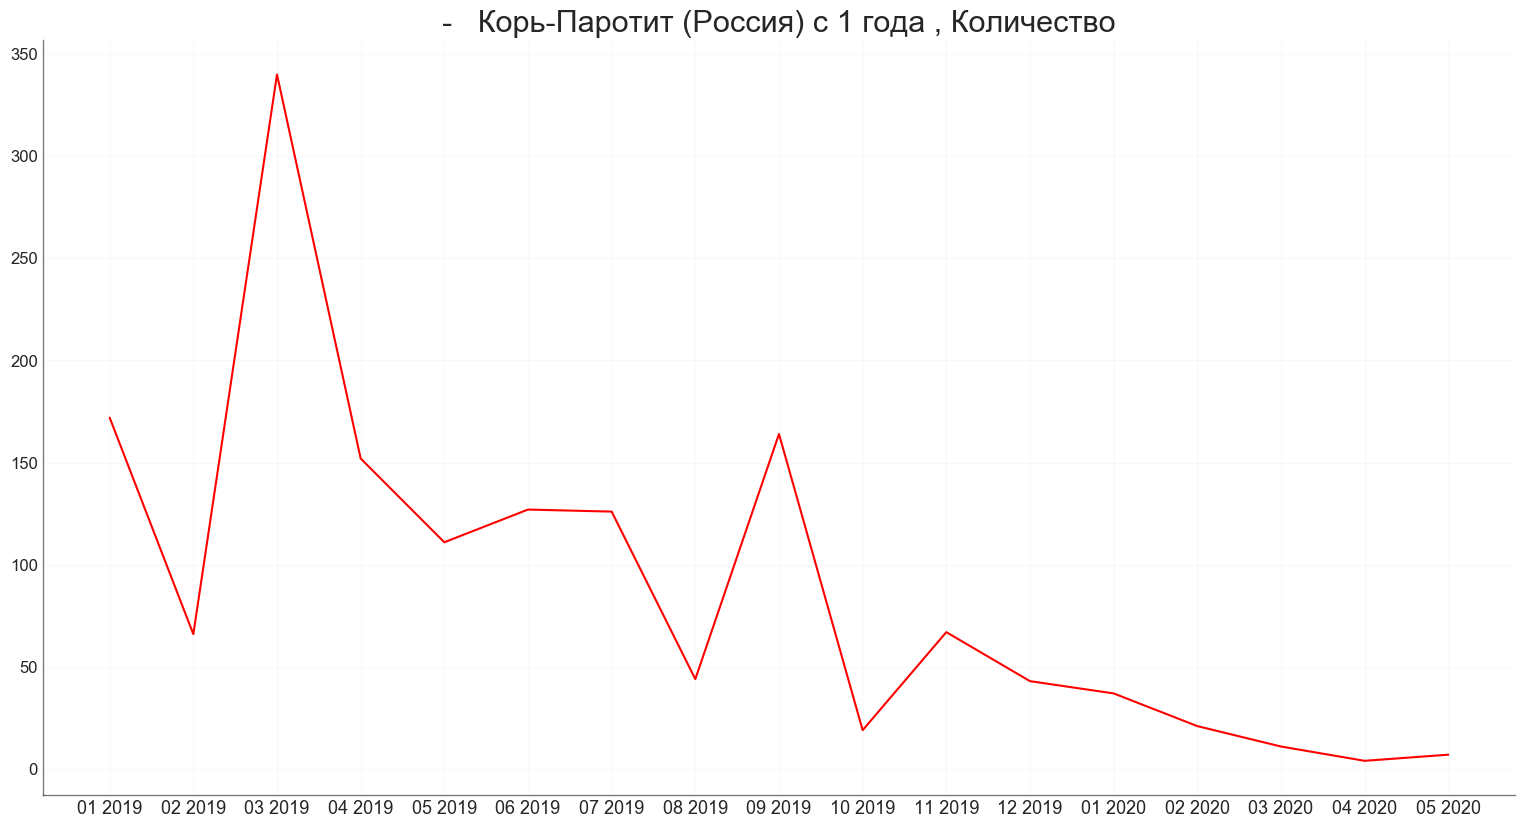

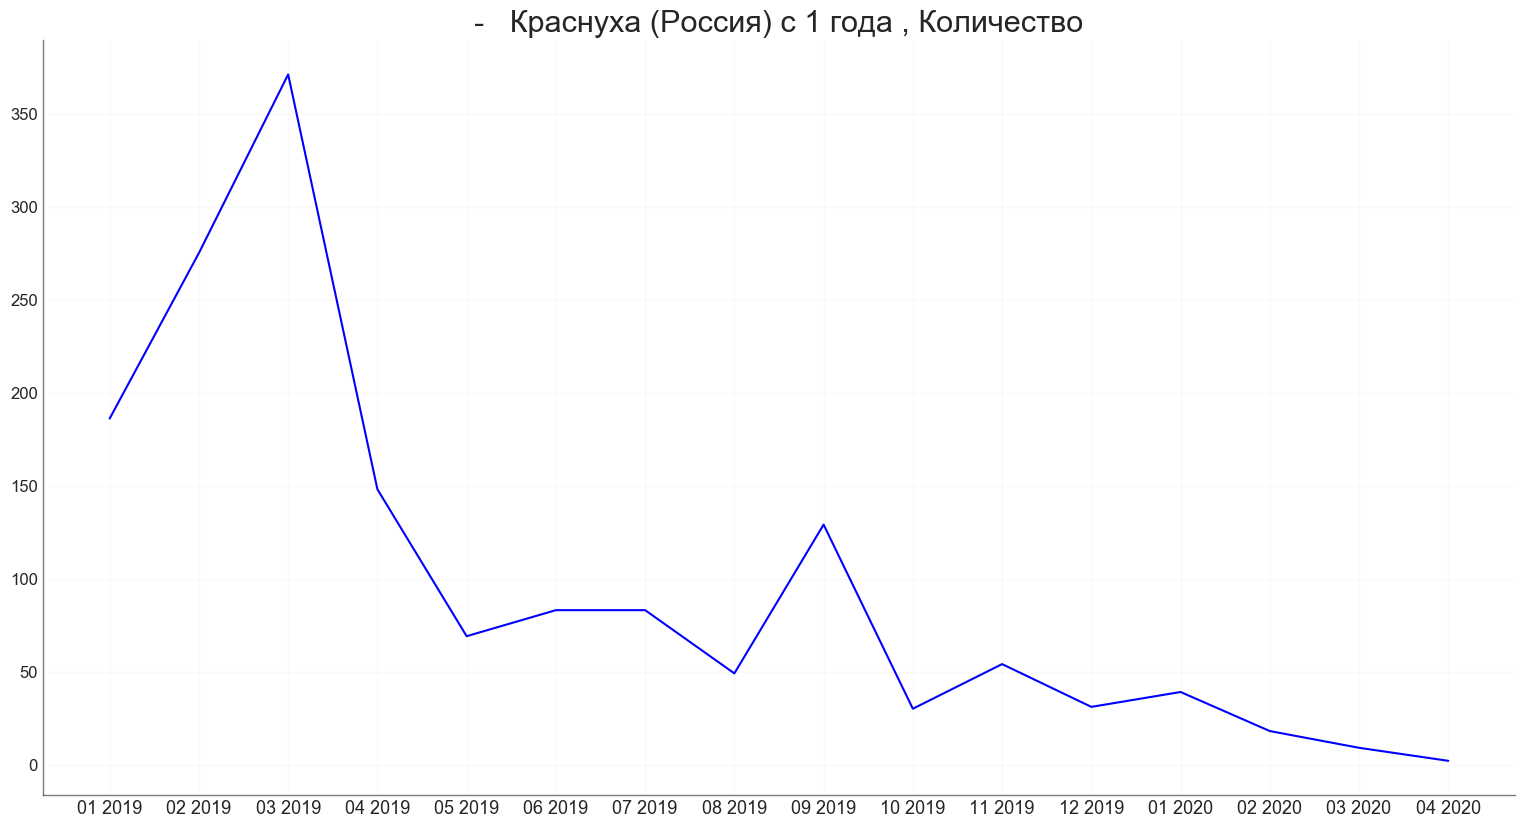

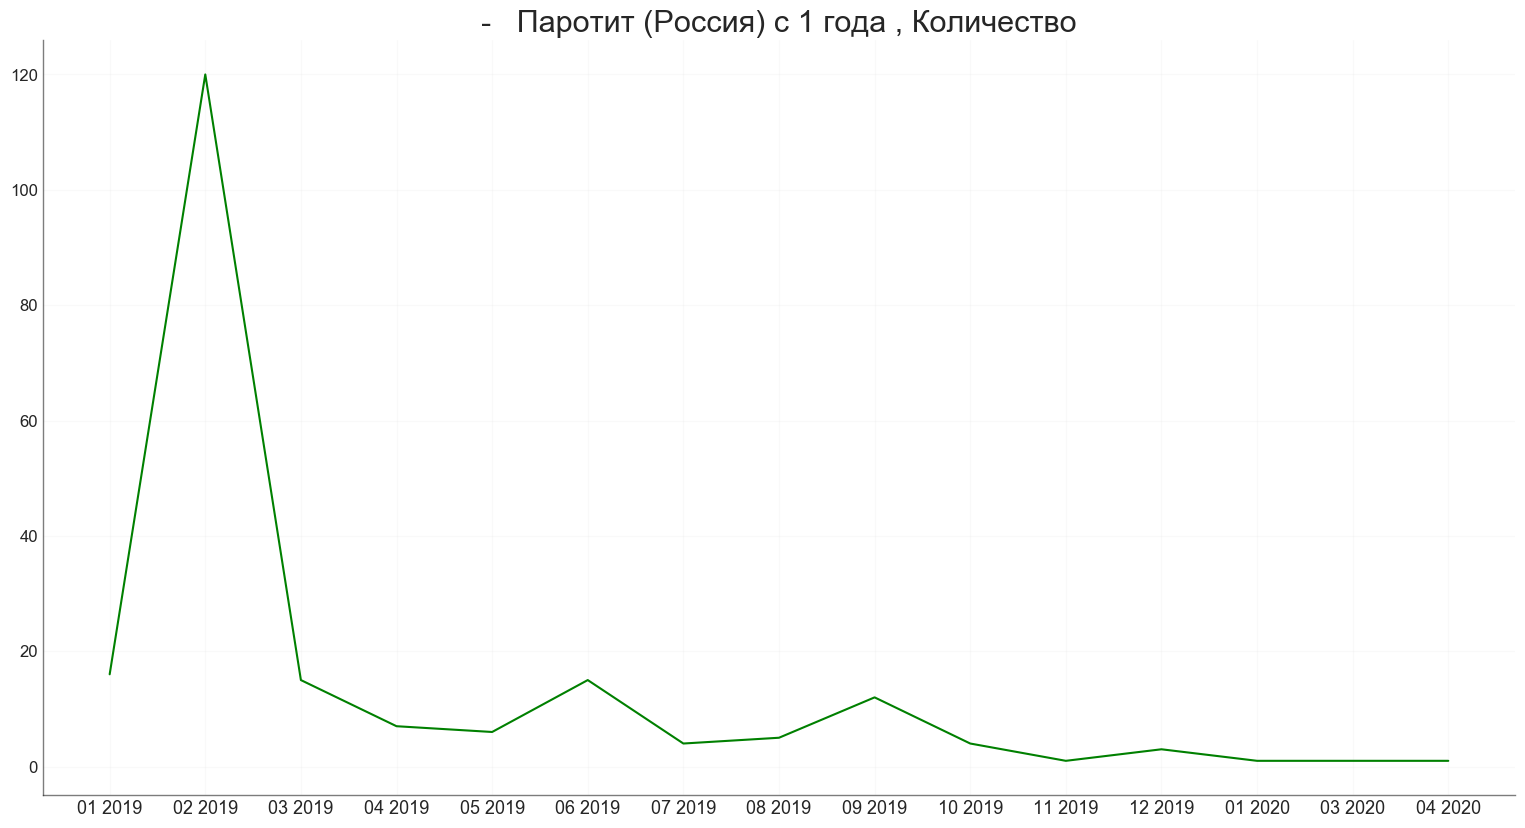

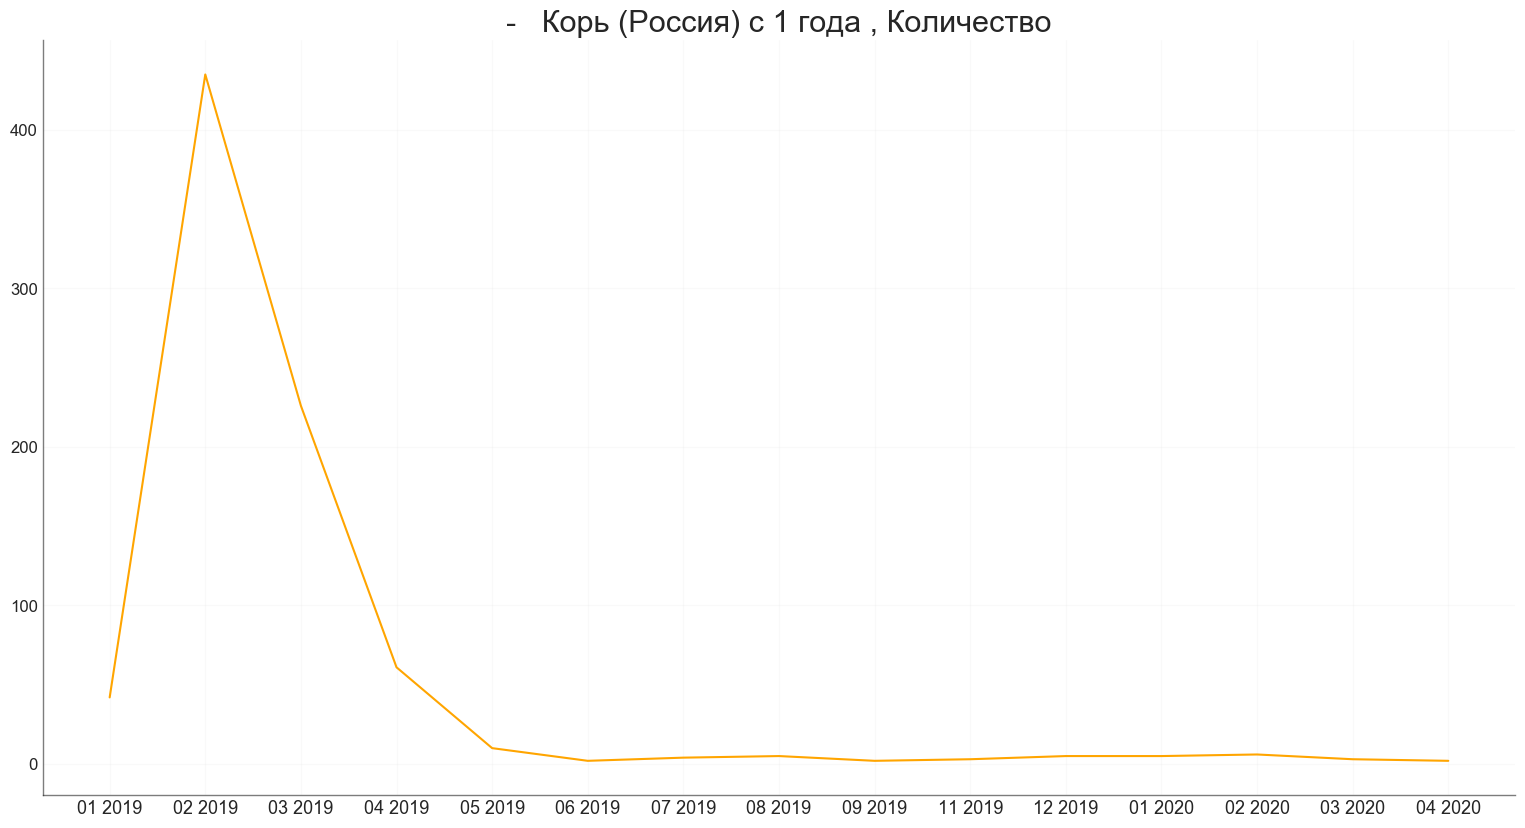

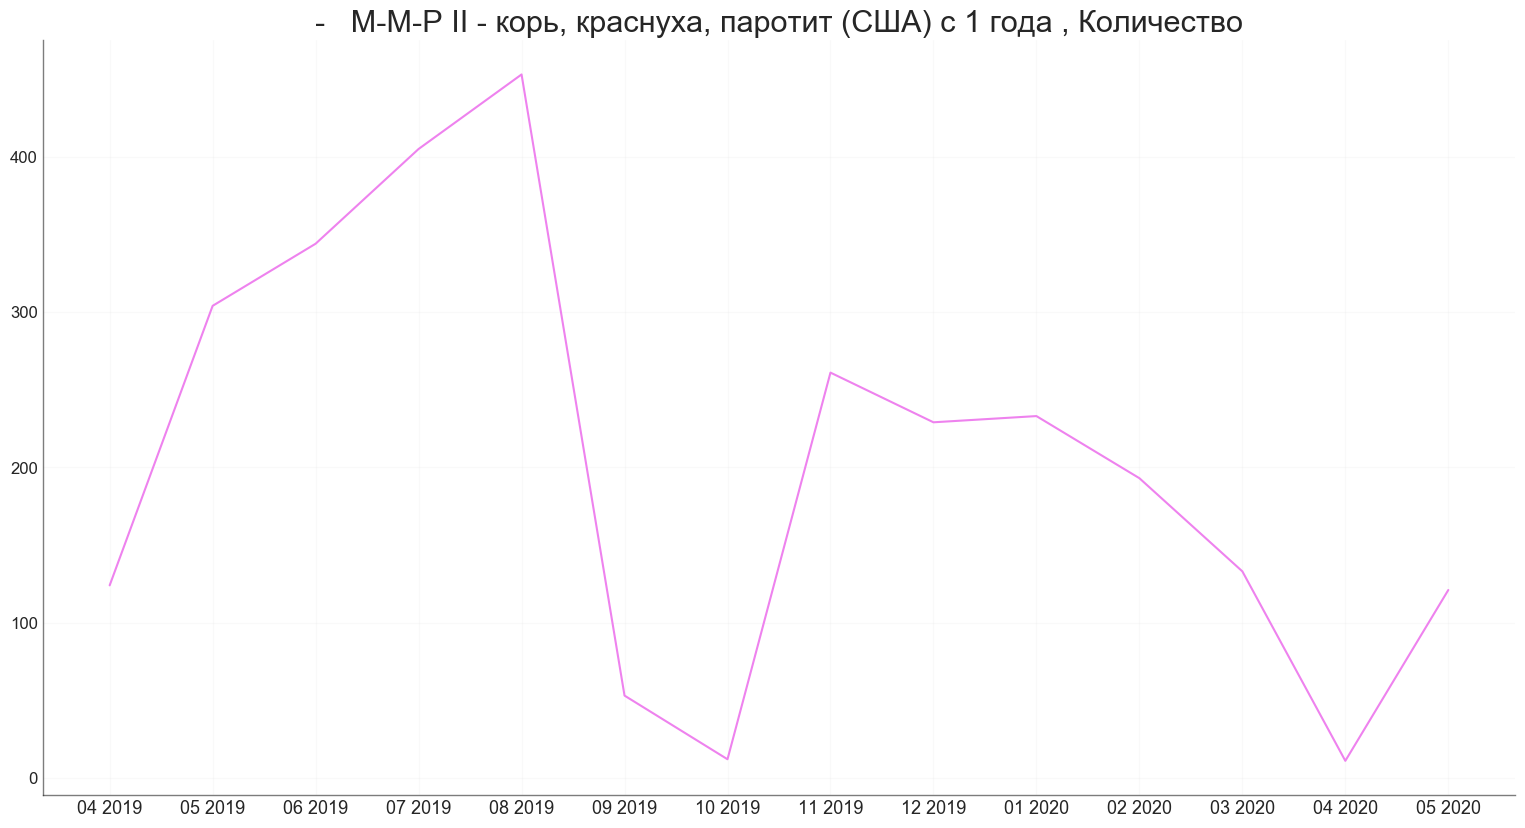

In [274]:
cnt = -1
colors = ['red', 'blue', 'green', 'orange', 'violet']
for i in set(group_data_new['Наименование услуги']):
    cnt += 1
    temp_group = group_data_new[group_data_new['Наименование услуги'] == i].reset_index().iloc[:, 1:]
    temp_group = temp_group.sort_values('Date')
    # Draw Plot
    plt.figure(figsize=(19,10), dpi= 100)
    plt.plot('Дата', 'Количество', data=temp_group, color=colors[cnt])

    # Decoration
    #plt.ylim(1, 450)
    xtick_location = temp_group.index.tolist()
    xtick_labels = [x for x in temp_group['Дата'].tolist()]
    plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=0, fontsize=13, horizontalalignment='center', alpha=1)
    plt.yticks(fontsize=12, alpha=1)
    plt.title(temp_group['Наименование услуги'].tolist()[0] + ' , Количество', fontsize=22)
    plt.grid(axis='both', alpha=.1)

    # Remove borders
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(0.6)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(0.6)   
    plt.show()

In [206]:
plt.show()

In [77]:
df

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,507.4,198712,12.5,4.5,2944
1,1967-08-01,510.5,198911,12.5,4.7,2945
2,1967-09-01,516.3,199113,11.7,4.6,2958
3,1967-10-01,512.9,199311,12.5,4.9,3143
4,1967-11-01,518.1,199498,12.5,4.7,3066
...,...,...,...,...,...,...
569,2014-12-01,12122.0,320201,5.0,12.6,8688
570,2015-01-01,12080.8,320367,5.5,13.4,8979
571,2015-02-01,12095.9,320534,5.7,13.1,8705
572,2015-03-01,12161.5,320707,5.2,12.2,8575


In [221]:
plt

AttributeError: module 'matplotlib.pyplot' has no attribute 'info'

In [282]:
list('asd').index('o')


ValueError: 'o' is not in list

In [283]:
'ddd'.split('.')

['ddd']

In [285]:
import re
'.'.join("table.imp.xls".split('.')[:-1])



'table.imp'

In [290]:
import re

re.search(r'\d+', "muchlonger")

In [297]:
def is_acceptable_password(password: str) -> bool:
    import re
    
    return bool(len(password) > 6 and re.search(r'\d+', password))

is_acceptable_password("muchlonger5")

True

In [302]:
def checkio(radius):
    from math import ceil
    r = ceil(radius)
    """count tiles"""
    return [((radius-1)*2)**2, ((r)*2)**2 - (int(r-1)*2)**2]

checkio(3)

[16, 20]

In [1]:
import pandas as pd

data = pd.read_excel(r'R:\AmanovRA\concurents.xlsx')



In [2]:
data

,Клиника,Координаты
0,Поликлиника №32,"59.971821, 30.303004"
1,Межрайонный врачебно-физкультурный диспансер №1,"59.970227, 30.30693"
2,Детская поликлиника №19,"59.956723, 30.331858"
3,Династия,"59.960557, 30.309104"
4,Долголетие,"59.956845, 30.321725"
5,Первая семейная клиника Петербурга,"59.959395, 30.317341"
6,Медицинский офис Петроградская,"59.964147, 30.282936"
7,Эксперт,"59.962309, 30.278992"
8,Медклиника,"59.966719, 30.313047"
9,Мэдис,"59.966102, 30.314206"


In [24]:
cnt = 3
for i in data.index:
    cnt +=1
    temp_concur = 'myPlacemarkWithContent' + str(cnt) +  '= new ymaps.Placemark([' + data['Координаты'][i] + '], {hintContent: "Собственный значок метки с контентом",balloonContent: "А эта — новогодняя",iconContent: ' + '"' + data['Клиника'][i] + '"' + '}, {iconLayout: "default#imageWithContent",iconImageHref: "images/concur.png",iconImageSize: [48, 48],iconImageOffset: [-24, -24],iconContentOffset: [30, -20],iconContentLayout: MyIconContentLayout});'
    print(temp_concur)
    print('\n')
    
for i in range(4, 58):
    print('.add(myPlacemarkWithContent' + str(i) + ')')

myPlacemarkWithContent4= new ymaps.Placemark([59.971821, 30.303004], {hintContent: "Собственный значок метки с контентом",balloonContent: "А эта — новогодняя",iconContent: "Поликлиника №32"}, {iconLayout: "default#imageWithContent",iconImageHref: "images/concur.png",iconImageSize: [48, 48],iconImageOffset: [-24, -24],iconContentOffset: [30, -20],iconContentLayout: MyIconContentLayout});


myPlacemarkWithContent5= new ymaps.Placemark([59.970227, 30.30693], {hintContent: "Собственный значок метки с контентом",balloonContent: "А эта — новогодняя",iconContent: "Межрайонный врачебно-физкультурный диспансер №1"}, {iconLayout: "default#imageWithContent",iconImageHref: "images/concur.png",iconImageSize: [48, 48],iconImageOffset: [-24, -24],iconContentOffset: [30, -20],iconContentLayout: MyIconContentLayout});


myPlacemarkWithContent6= new ymaps.Placemark([59.956723, 30.331858], {hintContent: "Собственный значок метки с контентом",balloonContent: "А эта — новогодняя",iconContent: "Детская поли

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [26]:
au_telefons = pd.read_excel(r'R:\AmanovRA\АУ_апрель_июнь_2020.xlsx')

In [27]:
dom, mobil, work = au_telefons['Телефон домашний'].tolist(), au_telefons['Телефон мобильный'].tolist(), au_telefons['Телефон рабочий'].tolist()

In [44]:
pattern = r'\(\d{2}\)'
pattern2 = r'[а-яА-Яa-zA-Z]{1}'

for key in (dom, mobil, work):
    for i, j in enumerate(key):
        if type(j) == str:
            key[i] = ''.join([x if x not in ',;!:.\\/+' else ' ' for x in j])        
            key[i] = key[i].lstrip(' ')
            key[i] = key[i].rstrip(' ')
            if re.search(pattern2, key[i]):
                key[i] = re.sub(pattern2, '', key[i])
            key[i] = ''.join([x for x in key[i] if x not in '()-'])  

In [51]:
for key in (dom, mobil, work):
    for i, j in enumerate(key):
        if type(j) == str:
            if len(j) == 7:
                key[i] = '7812' + key[i]
            elif len(j) == 11 and j[0] == '8':
                key[i] = '7' + j[1:]
            elif len(j) == 10:
                key[i] = '7' + j

In [52]:
dom

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '78126019637',
 '78126019637',
 '78126019637',
 '78126019637',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '78125502904',
 '78125502904',
 '78125502904',
 '78125502904',
 '78125502904',
 '78125502904',
 '78125502904',
 '78125502904',
 '78125502904',
 '78125502904',
 '78125502904',
 '78125502904',
 '78125502904',
 '78125502904',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '78135541794',
 '78135541794',
 '78135541794',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [62]:
time_doctor = pd.read_excel(r'C:\Users\AmanovRA\Текущее\Ане_Даценко_1й_квартал_2020\Расписание_2019_по_1й_квартал_2020.xlsx')
doctor_vu = pd.read_excel(r'C:\Users\AmanovRA\Текущее\Ане_Даценко_1й_квартал_2020\Врачи_кол-во_2019_по_1й_квартал_2020-1.xlsx')

In [63]:
lst_doctor, lst_vu = {}, {}

for i in time_doctor.index:
    lst_doctor.setdefault(time_doctor['Исполнитель'][i], {
        'Структура-2' : time_doctor['Структура 2 уровень'][i],
        'Структура-3' : time_doctor['Структура 3 уровень'][i],
        'Структура-4' : time_doctor['Структура 4 уровень'][i]
    })
    
    

In [64]:
for i in doctor_vu.index:
    lst_vu.setdefault(doctor_vu['Исполнитель'][i], {
        'Структура-2' : doctor_vu['Структура 2 уровень'][i],
        'Структура-3' : doctor_vu['Структура 3 уровень'][i],
        'Структура-4' : doctor_vu['Структура 4 уровень'][i]
    })

In [76]:
for key, val in lst_doctor.items():
    for key1, val1 in lst_vu.items():
        if key.split()[0].lower() == key1.split()[0].lower() and (key.split()[1][0] + '.' + key.split()[2][0] + '.') == key1.split()[1]: #and  lst_doctor[key]['Структура-2'] == lst_vu[key1]['Структура-2'] and lst_doctor[key]['Структура-3'] == lst_vu[key1]['Структура-3'] and lst_doctor[key]['Структура-4'] == lst_vu[key1]['Структура-4']:
            print(key, '   |   ', key1)

Захарова Наталья Владимировна    |    Захарова Н.В.
Абрамов Николай Николаевич    |    Абрамов Н.Н.
Новоселова Анжелика Сергеевна    |    Новоселова А.С.
Белозерова Анастасия Андреевна    |    Белозерова А.А.
Елисеева Маргарита Дмитриевна    |    Елисеева М.Д.
Ястребова Светлана Алексеевна    |    Ястребова С.А.
Васильев Никита Олегович    |    Васильев Н.О.
Ястребова Ольга Германовна    |    Ястребова О.Г.
Вишняков Роман Александрович    |    Вишняков Р.А.
Федотов Андрей Леонидович    |    Федотов А.Л.
Лоздовский Андрей Андреевич    |    Лоздовский А.А.
Макаров Вячеслав Георгиевич    |    Макаров В.Г.
Смирнов Евгений Сергеевич    |    Смирнов Е.С.
Тарасов Владимир Андреевич    |    Тарасов В.А.
Шильцин Матвей Сергеевич    |    Шильцин М.С.
Комаренко Олег Вячеславович    |    Комаренко О.В.
Хамицева Оксана Алановна    |    Хамицева О.А.
Щербакова Елена Олеговна    |    Щербакова Е.О.
Сухоруков Кирилл Вячеславович    |    Сухоруков К.В.
Ибрагимов Байрам Темирланович    |    Ибрагимов Б.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [3]:
au_telefons = pd.read_excel(r'C:\Users\AmanovRA\Текущее\Лиды_апрель_май\АУ.xlsx')

In [4]:
dom, mobil, work = au_telefons['Телефон домашний'].tolist(), au_telefons['Телефон мобильный'].tolist(), au_telefons['Телефон рабочий'].tolist()

In [5]:
pattern = r'\(\d{2}\)'
pattern2 = r'[а-яА-Яa-zA-Z]{1}'

for key in (dom, mobil, work):
    for i, j in enumerate(key):
        if type(j) == str:
            key[i] = ''.join([x if x not in ',;!:.\\/+' else ' ' for x in j])        
            key[i] = key[i].lstrip(' ')
            key[i] = key[i].rstrip(' ')
            if re.search(pattern2, key[i]):
                key[i] = re.sub(pattern2, '', key[i])
            key[i] = ''.join([x for x in key[i] if x not in '()-'])  

In [6]:
for key in (dom, mobil, work):
    for i, j in enumerate(key):
        if type(j) == str:
            if len(j) == 7:
                key[i] = '7812' + key[i]
            elif len(j) == 11 and j[0] == '8':
                key[i] = '7' + j[1:]
            elif len(j) == 10:
                key[i] = '7' + j

In [7]:
def concate_lists(*args) -> list:   # соединим все номера в одну строку чтобы проще было искать
    temp_lst = []
    for i in range(len(args[0])):
        temp_lst.append(' '.join([str(x[i]) for x in args]))
    return temp_lst
            
lst_search = concate_lists(dom, mobil, work)    

In [8]:
lenya = pd.read_excel(r'C:\Users\AmanovRA\Текущее\Лиды_апрель_май\форма онлайн записи (1) для Лени - эмайл.xlsx', sheet_name='Лист2')

In [9]:
lenya['Телефон'] = lenya['Телефон'].apply(str)

In [10]:
lst_with_coincidenc_lenya = []
for index, row in enumerate(lst_search):
    lst_with_coincidenc_lenya.append([])
    for i in lenya['Телефон']:
        if str(i) in row:
            lst_with_coincidenc_lenya[index].append(str(i))

In [11]:
au_telefons['Леня'] = lst_with_coincidenc_lenya

In [12]:
def join_list(lst):
    return ', '.join([str(i) for i in lst])

au_telefons['Леня'] = au_telefons['Леня'].apply(join_list)

In [13]:
au_telefons.to_excel(r'C:\Users\AmanovRA\Текущее\Лиды_апрель_май\Леня_АУ_по_июнь_второе.xlsx')

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [15]:
vu_telefons = pd.read_excel(r'C:\Users\AmanovRA\Текущее\Лиды_апрель_май\ВУ_по_июнь.xlsx')

In [16]:
phones = vu_telefons['Телефон'].tolist()

In [17]:
pattern = r'\(\d{2}\)'
pattern2 = r'[а-яА-Яa-zA-Z]{1}'

for i, j in enumerate(phones):
    if re.search(pattern, j):
        if '(61)' in j:
            phones[i] = phones[i].replace('(61)', ', 321-61-61, ')
        elif  '(39)' in j:   
            phones[i] = phones[i].replace('(39)', ', 305-73-39, ')
        elif '(73)' in j:
            phones[i] = phones[i].replace('(73)', '')
            phones[i] += ' , 558-73-09 '
        elif ('21') in j:
            phones[i] = phones[i].replace('(21)', '(921)')
    phones[i] = ''.join([x if x not in ',;!:.\\/+' else ' ' for x in j])        
    phones[i] = phones[i].lstrip(' ')
    phones[i] = phones[i].rstrip(' ')
    if re.search(pattern2, phones[i]):
        phones[i] = re.sub(pattern2, '', phones[i])
    phones[i] = ''.join([x for x in phones[i] if x not in '()-']) 

In [18]:
phones2 = phones.copy()

In [19]:
for i, j in enumerate(phones2):
    phones2[i] = j.split()

In [20]:
from functools import reduce
for i, j in enumerate(phones2):
    try:
        phones2[i].append(reduce(lambda x, y: x + y, [z for z in j if len(z) < 7]))
    except:
        continue

In [21]:
for i, j in enumerate(phones2):
    for x, y in enumerate(j):
        if x != len(j) - 1:
            if len(y) == 4 and len(j[x + 1]) == 7 and y[:2] in ('79', '89'):
                    phones2[i].append(y + j[x + 1])
            elif y in ('7', '8') and len(j[x + 1]) == 10:
                phones2[i].append(y + j[x + 1])

In [22]:
for i, j in enumerate(phones2):
    phones2[i] = [x for x in phones2[i] if len(x) >= 7]

In [23]:
for i, j in enumerate(phones2):
    for x, y in enumerate(j):
        if len(y) == 7:
            phones2[i][x] = '7812' + phones2[i][x]
        elif len(y) == 11 and y[0] == '8':
            phones2[i][x] = '7' + y[1:]
        elif len(y) == 10:
            phones2[i][x] = '7' + y

In [24]:
vu_telefons['Чистые_телефоны'] = phones2

In [25]:
lenya = pd.read_excel(r'C:\Users\AmanovRA\Текущее\Лиды_апрель_май\форма онлайн записи (1) для Лени - эмайл.xlsx', sheet_name='Лист2')

In [26]:
lenya['Телефон'] = lenya['Телефон'].apply(str)

In [27]:
lst_with_coincidenc_april = []
for index, row in enumerate(phones2):
    lst_with_coincidenc_april.append([])
    for i in lenya['Телефон']:
        if str(i) in row:
            lst_with_coincidenc_april[index].append(str(i))

In [28]:
vu_telefons['Леня'] = lst_with_coincidenc_april

In [29]:
def join_list(lst):
    return ', '.join([str(i) for i in lst])

vu_telefons['Леня'] = vu_telefons['Леня'].apply(join_list)

In [ ]:
vu_telefons.to_excel(r'C:\Users\AmanovRA\Текущее\Лиды_апрель_май\Леня_ВУ_по_июнь_второе.xlsx')

In [53]:
vu_telefons = pd.read_excel(r'C:\Users\AmanovRA\Текущее\Лиды_апрель_май\ВУ_для_такси.xlsx')

In [54]:
phones = vu_telefons['Телефон'].tolist()

In [55]:
pattern = r'\(\d{2}\)'
pattern2 = r'[а-яА-Яa-zA-Z]{1}'

for i, j in enumerate(phones):
    if re.search(pattern, j):
        if '(61)' in j:
            phones[i] = phones[i].replace('(61)', ', 321-61-61, ')
        elif  '(39)' in j:   
            phones[i] = phones[i].replace('(39)', ', 305-73-39, ')
        elif '(73)' in j:
            phones[i] = phones[i].replace('(73)', '')
            phones[i] += ' , 558-73-09 '
        elif ('21') in j:
            phones[i] = phones[i].replace('(21)', '(921)')
    phones[i] = ''.join([x if x not in ',;!:.\\/+' else ' ' for x in j])        
    phones[i] = phones[i].lstrip(' ')
    phones[i] = phones[i].rstrip(' ')
    if re.search(pattern2, phones[i]):
        phones[i] = re.sub(pattern2, '', phones[i])
    phones[i] = ''.join([x for x in phones[i] if x not in '()-']) 

In [56]:
phones2 = phones.copy()

for i, j in enumerate(phones2):
    phones2[i] = j.split()
    
    
from functools import reduce
for i, j in enumerate(phones2):
    try:
        phones2[i].append(reduce(lambda x, y: x + y, [z for z in j if len(z) < 7]))
    except:
        continue
        
for i, j in enumerate(phones2):
    for x, y in enumerate(j):
        if x != len(j) - 1:
            if len(y) == 4 and len(j[x + 1]) == 7 and y[:2] in ('79', '89'):
                    phones2[i].append(y + j[x + 1])
            elif y in ('7', '8') and len(j[x + 1]) == 10:
                phones2[i].append(y + j[x + 1])
                
for i, j in enumerate(phones2):
    phones2[i] = [x for x in phones2[i] if len(x) >= 7]
    
for i, j in enumerate(phones2):
    for x, y in enumerate(j):
        if len(y) == 7:
            phones2[i][x] = '7812' + phones2[i][x]
        elif len(y) == 11 and y[0] == '8':
            phones2[i][x] = '7' + y[1:]
        elif len(y) == 10:
            phones2[i][x] = '7' + y  
            
            
def join_list(lst):
    return ', '.join([str(i) for i in lst])

vu_telefons['Чистые_телефоны'] = phones2

vu_telefons['Чистые_телефоны'] = vu_telefons['Чистые_телефоны'].apply(join_list)            
                



            

In [57]:
vu_telefons

,Номер карты,Исполнитель,Наименование услуги,Пациент,Дата приема,Дата первого посещения Пациента,Категория клиента,Специализация приема,Телефон,Стоимость полная,Sum([Количество]),Категория крупно,Уник_клиент_разрез_Карта_месяц,Чистые_телефоны
0,2737,Соловьев К.Ю.,"""Такси/Детское такси"" (1 км)",Кушнерева Наталья Викторовна,2020-02-07,2002-11-04,НАЛ,Медтакси,8-921-979-61-01;,410.0,1,медицинские такси,1,79219796101
1,2737,Соловьев К.Ю.,"""Такси/Детское такси"" (1 км)",Кушнерева Наталья Викторовна,2020-02-18,2002-11-04,НАЛ,Медтакси,8-921-979-61-01;,410.0,1,медицинские такси,0,79219796101
2,5149,Соловьев К.Ю.,"""Такси/Детское такси"" (1 км)",Соколова Елизавета Аркадьевна,2020-02-28,2002-11-19,СК факт,Медтакси,"368-83-45,8921-981-09-94",1080.0,1,медицинские такси,1,"78123688345, 79219810994"
3,5149,Соловьев К.Ю.,"""Такси/Детское такси"" (1 км)",Соколова Елизавета Аркадьевна,2020-04-23,2002-11-19,СК факт,Медтакси,"368-83-45,8921-981-09-94",1500.0,1,медицинские такси,1,"78123688345, 79219810994"
4,5149,Соловьев К.Ю.,"""Такси/Детское такси"" (1 км)",Соколова Елизавета Аркадьевна,2020-04-26,2002-11-19,СК факт,Медтакси,"368-83-45,8921-981-09-94",790.0,1,медицинские такси,0,"78123688345, 79219810994"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3663,990506177,Соловьев К.Ю.,Транспортировка лежачего пассажира по СПб с по...,Меняев Георгий Денисович,2020-05-25,2020-05-25,НАЛ,Медтакси,", +7(931)276-16-64",3000.0,1,медицинские такси,1,79312761664
3664,990506196,Соловьев К.Ю.,Транспортировка лежачего пассажира по СПб с по...,Ямщикова Лариса Владимировна,2020-05-26,2020-05-26,НАЛ,Медтакси,", +7(921)575-75-53",2500.0,1,медицинские такси,1,79215757553
3665,990506197,Соловьев К.Ю.,Транспортировка лежачего пассажира по СПб с по...,Чивилихин Сергей Анатольевич,2020-05-26,2020-05-26,НАЛ,Медтакси,", +7(911)953-04-20",3000.0,1,медицинские такси,1,79119530420
3666,990506199,Соловьев К.Ю.,Транспортировка лежачего пассажира по СПб с по...,Анисимова Тамара Владимировна,2020-05-19,2020-05-19,НАЛ,Медтакси,-,2500.0,1,медицинские такси,1,


In [69]:
taxi = pd.read_excel(r'C:\Users\AmanovRA\Текущее\Лиды_апрель_май\выгрузка данных по транспортной службе.xlsx', sheet_name='обратный звонок', usecols='A,C,D')

In [70]:
taxi = taxi.append(pd.read_excel(r'C:\Users\AmanovRA\Текущее\Лиды_апрель_май\выгрузка данных по транспортной службе.xlsx', sheet_name='заказ перевозки', usecols='A,C,D'))

In [71]:
taxi = taxi.append(pd.read_excel(r'C:\Users\AmanovRA\Текущее\Лиды_апрель_май\выгрузка данных по транспортной службе.xlsx', sheet_name='звонки'))

In [72]:
taxi

,Дата,Телефон,Источник
0,2020-05-13,79219433987,Обратный звонок
1,2020-05-12,79112270883,Обратный звонок
2,2020-05-08,79119250942,Обратный звонок
3,2020-05-07,79112872848,Обратный звонок
4,2020-05-06,79213192021,Обратный звонок
...,...,...,...
755,2020-02-01,79219775368,Звонки
756,2020-02-01,79062522550,Звонки
757,2020-02-01,78126529612,Звонки
758,2020-02-01,79214475049,Звонки


In [73]:
vu_telefons

,Номер карты,Исполнитель,Наименование услуги,Пациент,Дата приема,Дата первого посещения Пациента,Категория клиента,Специализация приема,Телефон,Стоимость полная,Sum([Количество]),Категория крупно,Уник_клиент_разрез_Карта_месяц,Чистые_телефоны
0,2737,Соловьев К.Ю.,"""Такси/Детское такси"" (1 км)",Кушнерева Наталья Викторовна,2020-02-07,2002-11-04,НАЛ,Медтакси,8-921-979-61-01;,410.0,1,медицинские такси,1,79219796101
1,2737,Соловьев К.Ю.,"""Такси/Детское такси"" (1 км)",Кушнерева Наталья Викторовна,2020-02-18,2002-11-04,НАЛ,Медтакси,8-921-979-61-01;,410.0,1,медицинские такси,0,79219796101
2,5149,Соловьев К.Ю.,"""Такси/Детское такси"" (1 км)",Соколова Елизавета Аркадьевна,2020-02-28,2002-11-19,СК факт,Медтакси,"368-83-45,8921-981-09-94",1080.0,1,медицинские такси,1,"78123688345, 79219810994"
3,5149,Соловьев К.Ю.,"""Такси/Детское такси"" (1 км)",Соколова Елизавета Аркадьевна,2020-04-23,2002-11-19,СК факт,Медтакси,"368-83-45,8921-981-09-94",1500.0,1,медицинские такси,1,"78123688345, 79219810994"
4,5149,Соловьев К.Ю.,"""Такси/Детское такси"" (1 км)",Соколова Елизавета Аркадьевна,2020-04-26,2002-11-19,СК факт,Медтакси,"368-83-45,8921-981-09-94",790.0,1,медицинские такси,0,"78123688345, 79219810994"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3663,990506177,Соловьев К.Ю.,Транспортировка лежачего пассажира по СПб с по...,Меняев Георгий Денисович,2020-05-25,2020-05-25,НАЛ,Медтакси,", +7(931)276-16-64",3000.0,1,медицинские такси,1,79312761664
3664,990506196,Соловьев К.Ю.,Транспортировка лежачего пассажира по СПб с по...,Ямщикова Лариса Владимировна,2020-05-26,2020-05-26,НАЛ,Медтакси,", +7(921)575-75-53",2500.0,1,медицинские такси,1,79215757553
3665,990506197,Соловьев К.Ю.,Транспортировка лежачего пассажира по СПб с по...,Чивилихин Сергей Анатольевич,2020-05-26,2020-05-26,НАЛ,Медтакси,", +7(911)953-04-20",3000.0,1,медицинские такси,1,79119530420
3666,990506199,Соловьев К.Ю.,Транспортировка лежачего пассажира по СПб с по...,Анисимова Тамара Владимировна,2020-05-19,2020-05-19,НАЛ,Медтакси,-,2500.0,1,медицинские такси,1,


In [86]:
vu_telefons['Чистые_телефоны'] = phones2

taxi['Телефон'] = taxi['Телефон'].apply(str)

lst_with_coincidenc_taxi = []
sources_taxi = []
for index, row in enumerate(phones2):
    lst_with_coincidenc_taxi.append([])
    sources_taxi.append([])
    for i,j in enumerate(taxi['Телефон']):
        if str(j) in row:
            lst_with_coincidenc_taxi[index].append(str(j))
            sources_taxi[index].append([taxi['Источник'][i]])
            
vu_telefons['Телефоны_Валера'] = lst_with_coincidenc_taxi
vu_telefons['Телефоны_Источник'] = sources_taxi

def join_list(lst):
    return ', '.join([str(i) for i in lst])

vu_telefons['Телефоны_Валера'] = vu_telefons['Телефоны_Валера'].apply(join_list)
vu_telefons['Телефоны_Источник'] = vu_telefons['Телефоны_Источник'].apply(join_list)

482
571
571
739
102
478
581
510
510
510
510
764
405
715
816
293
293
417
272
272
32
757
200
200
189
831
204
655
307
583
633
686
273
144
716
602
602
688
688
636
636
636
545
545
545
348
287
305
31
868
868
302
534
75
861
702
702
702
702
702
612
154
192
155
795
795
870
870
911
906
855
855
832
881
803
803
862
727
727
867
24
24
712
712
848
850
836
837
90
833
832
91
830
89
88
73
819
818
818
358
806
800
147
78
76
77
782
779
143
773
763
760
760
760
760
595
595
756
140
744
120
120
120
120
724
725
719
138
713
713
60
706
703
134
690
666
683
683
683
133
132
131
776
660
52
128
127
646
126
47
638
122
121
609
608
607
476
615
476
615
476
615
43
45
613
598
600
41
120
118
591
40
586
588
336
336
576
577
568
487
412
412
412
562
560
557
555
553
551
549
549
547
108
108
5
5
5
727
125
116
536
536
536
535
594
530
30
529
523
111
516
504
26
503
498
487
487
107
473
469
106
456
455
105
72
446
447
20
20
20
20
438
15
28
17
17
431
425
101
101
100
422
396
18
18
18
99
399
95
378
321
321
340
385
381
384
8
377
371
365
351


In [79]:
for i,j in enumerate(taxi['Телефон']):
    print(i, j)

0 79219433987
1 79112270883
2 79119250942
3 79112872848
4 79213192021
5 79650663861
6 79522327442
7 79219000771
8 79213032116
9 79602304675
10 79112302282
11 79062741051
12 79119539061
13 79872585552
14 79515793862
15 79119319788
16 79211549515
17 79219523382
18 79218930988
19 79117957975
20 79992508505
21 79214854856
22 79500269308
23 79215775354
24 79110989147
25 79052897990
26 79213774066
27 79213410494
28 79111731172
29 79119256596
30 79522393039
31 79119332951
32 79219370585
33 79110226333
34 79112968829
35 79502207335
36 79275131976
37 79527975933
38 79500365427
39 79219739146
40 79117958298
41 79312441423
42 79633224224
43 79650816558
44 79995377067
45 79313516159
46 79500430444
47 79042118209
48 79304164865
49 79516693187
50 79119010523
51 79643929533
52 79500166932
53 78125841798
54 79522277415
55 79523708690
56 79522285617
57 79119333425
58 79217717833
59 79045123541
60 79219040124
61 79313288938
62 79119319922
63 79523903257
64 79046085128
65 79523919432
66 79811916127
67 79

In [81]:
taxi = taxi.reset_index()

In [84]:
taxi.drop('index',axis=1,  inplace=True)

In [85]:
taxi

,Дата,Телефон,Источник
0,2020-05-13,79219433987,Обратный звонок
1,2020-05-12,79112270883,Обратный звонок
2,2020-05-08,79119250942,Обратный звонок
3,2020-05-07,79112872848,Обратный звонок
4,2020-05-06,79213192021,Обратный звонок
...,...,...,...
911,2020-02-01,79219775368,Звонки
912,2020-02-01,79062522550,Звонки
913,2020-02-01,78126529612,Звонки
914,2020-02-01,79214475049,Звонки


In [89]:
vu_telefons.to_excel(r'C:\Users\AmanovRA\Текущее\Лиды_апрель_май\Такси_февраль_май.xlsx')